We have some data related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The end goal is to predict if the client will subscribe a term deposit.

First, let's perform some data analysis!

In [3]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data
data = pd.read_csv("bank-additional-full.csv", sep=";")

# cleaning output data from string to boolean
mapping = { 'no': False, 'yes': True }
data['y'] = data['y'].map(mapping)

## 1. Basic verfications
### 1.1 Number of items

In [4]:
print data["y"].count()

41188


It seems to be enough data.

### 1.2 Data Balance

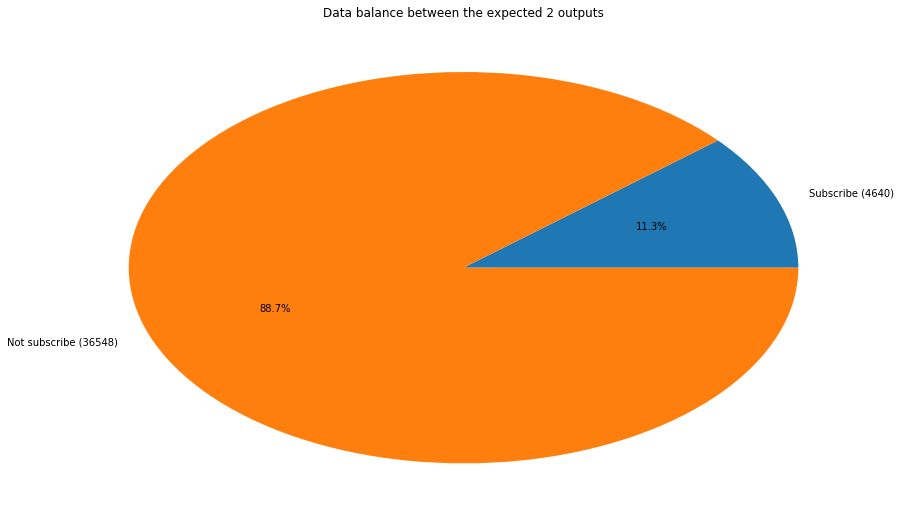

In [5]:
subscribe = data[data["y"] == True]["y"].count()
not_subscribe = data[data["y"] == False]["y"].count()

labels = [
    "Subscribe (%(subscribe)s)" % locals(),
    "Not subscribe (%(not_subscribe)s)" % locals()
]
sizes = [subscribe, not_subscribe]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Data balance between the expected 2 outputs")

plt.show()

Some remarks:
- The data isunbalanced,
- 5640 subscriptions is still enough to recognize rough patterns,
- The marketing campagin have a conversion rate of 11%. It's good and it's going to be tough to optimize.

## 2. Features distribution
### 2.1 Features distribution for numerical values

Populating the interactive namespace from numpy and matplotlib


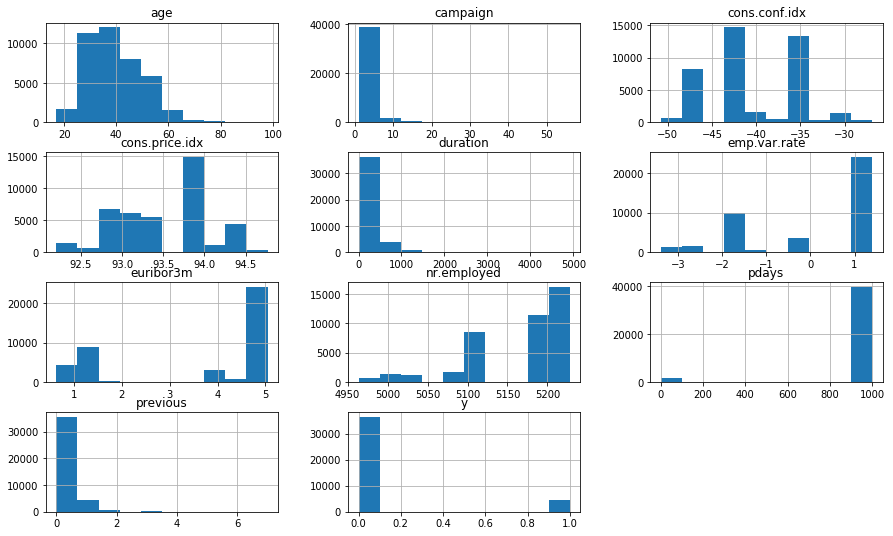

Populating the interactive namespace from numpy and matplotlib


In [6]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

data.hist()
plt.show()

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Remarkable outliers (numerical values):
* campaign = 1
* Duration: 4 samples = 0. They have never been contacted and they can be deleted
* pdays: 999 for people who have never been contacted
* previous: lot of contacts have not been contacted for any campaign

### 2.2 Features distribution for non-numerical values

Populating the interactive namespace from numpy and matplotlib


TypeError: display_graph_for() takes at least 3 arguments (1 given)

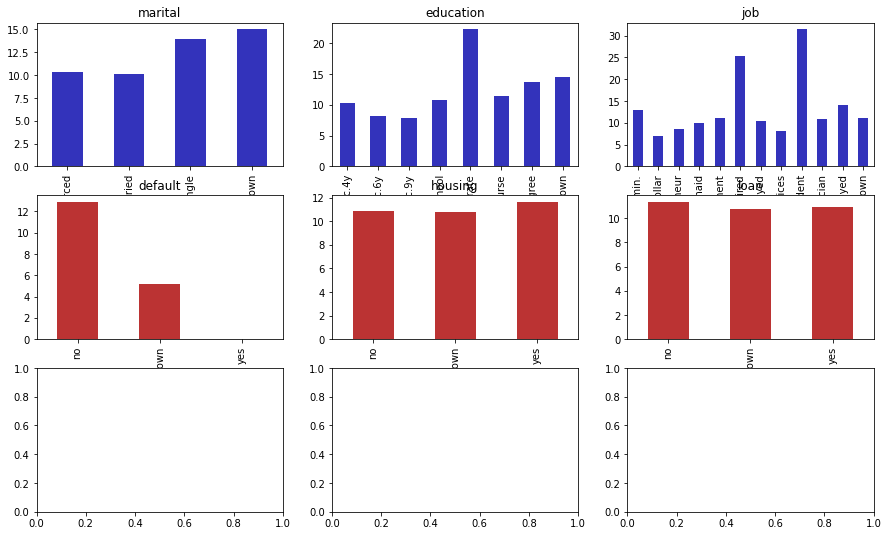

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

fig, axes = plt.subplots(nrows=3, ncols=3)
def display_graph_for(attribute, foo, bar, color='#3333BB'):
    vector = pd.groupby(data['y'], data[attribute])
    sums = vector.sum()
    counts = vector.count()
    (sums / counts * 100).plot(kind='bar', ax=axes[foo,bar], color=color, title=attribute)
 
# Socio-demographic information
display_graph_for('marital', 0, 0)
display_graph_for('education', 0, 1)
display_graph_for('job', 0, 2)

# credit information
display_graph_for('default', 1, 0, color='#BB3333')
display_graph_for('housing', 1, 1, color='#BB3333')
display_graph_for('loan', 1, 2, color='#BB3333')

# Previous contact information
display_graph_for('month', 2, 0, color='#33BB33')
display_graph_for('day_of_week', 2, 1, color='#33BB33')
display_graph_for('poutcome', 2, 2, color='#33BB33')
plt.show()

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

* We have categorical values: we will probably need to one-hot-encode the features in order that our algorithm understand it.
* Lot of features have unkown values. The number of unkown values is also not ignorable. We will need to pick an ML algorithm that handle missing values.